# Problem Statement: Predict if the client will subscribe to a term deposit

## Preprocessing for KNN and Decision Tree

### Reading the Bank Marketing Data from the csv file

In [1]:
import random
import pandas as pd
import numpy as np
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Data visualization

#### Visualizing the success rate based on the job role

In [2]:
jobs = list(df['job'].unique())
df1 = df[['job','y']].value_counts()

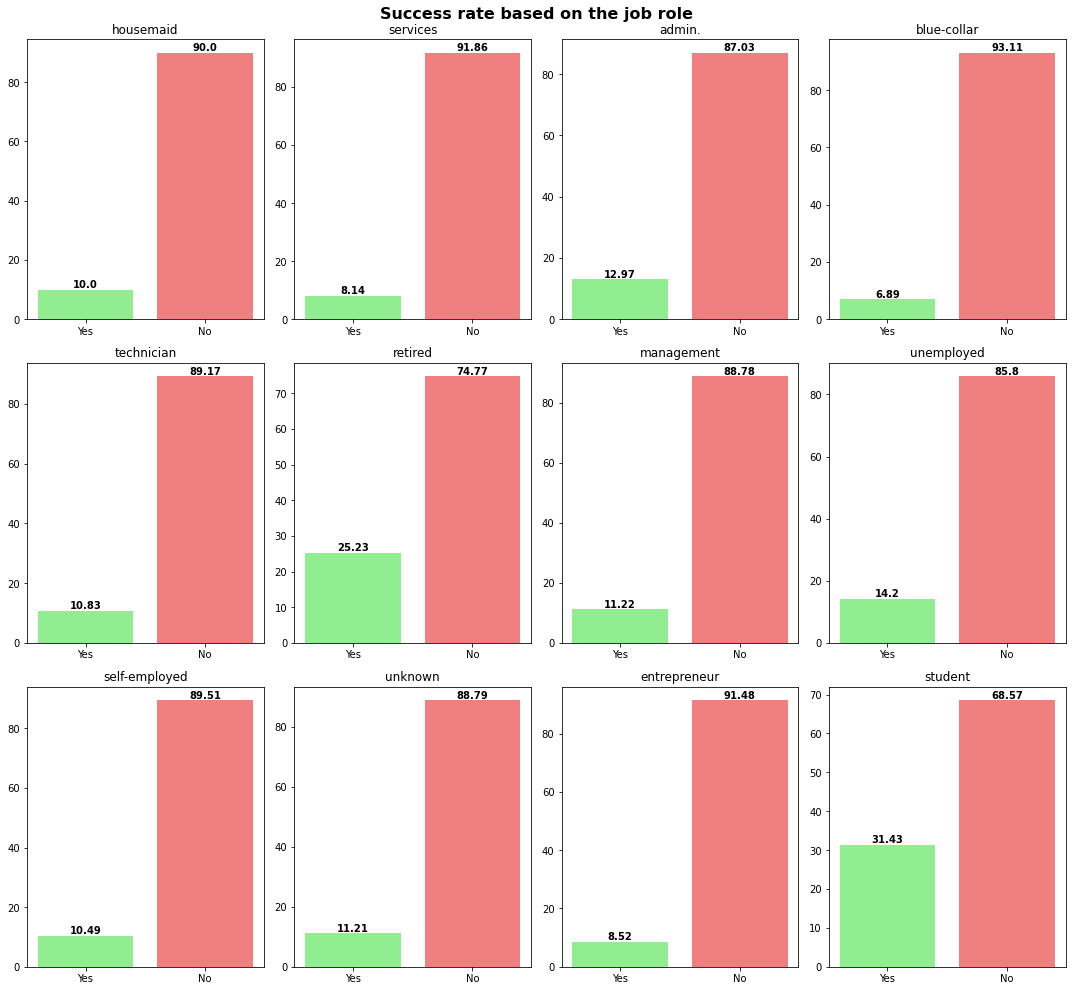

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 4, figsize=(15, 14))

axs = axs.flatten()

colors = {'Yes': 'lightgreen', 'No': 'lightcoral'}

for i in range(3):
    for j in range(4):
        prof = jobs[i * 4 + j]
        yes_val = df1[prof]['yes']
        no_val = df1[prof]['no']
        tot_val = yes_val + no_val
        labels, values = ['Yes', 'No'],  [round(100*yes_val/tot_val, 2),  round(100*no_val/tot_val, 2)]
        axs[i * 4 + j].bar(labels, values, color=[colors[label] for label in labels])
        axs[i * 4 + j].set_title(f'{prof}')

        for label, value in zip(labels, values):
            axs[i * 4 + j].text(label, value, str(value), ha='center', va='bottom', fontweight='bold')


fig.suptitle('Success rate based on the job role', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

#### Visualizing outcomes based on education and month

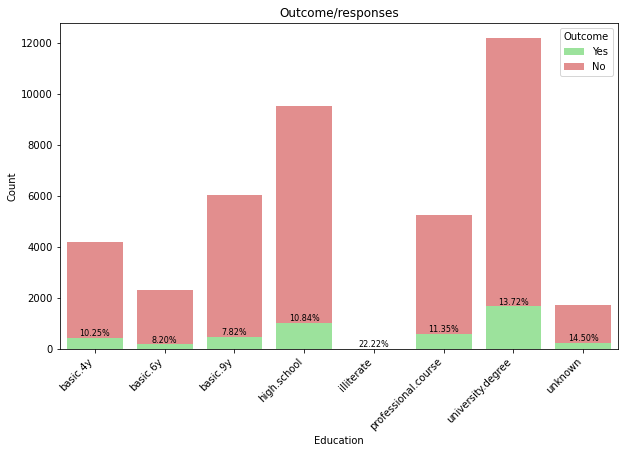

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


cross_tab = pd.crosstab(df['education'], df['y'])

plt.figure(figsize=(10, 6))
sns.barplot(x=cross_tab.index, y=cross_tab['yes'], label='Yes', color='lightgreen')
sns.barplot(x=cross_tab.index, y=cross_tab['no'], bottom=cross_tab['yes'], label='No', color='lightcoral')

plt.title('Outcome/responses')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.xticks(rotation=45, ha='right')

total_counts = cross_tab.sum(axis=1)
for edu, count, bar in zip(cross_tab.index, total_counts, plt.gca().patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{cross_tab.loc[edu]["yes"] / count * 100:.2f}%', ha='center', va='bottom', fontsize=8)

plt.show()

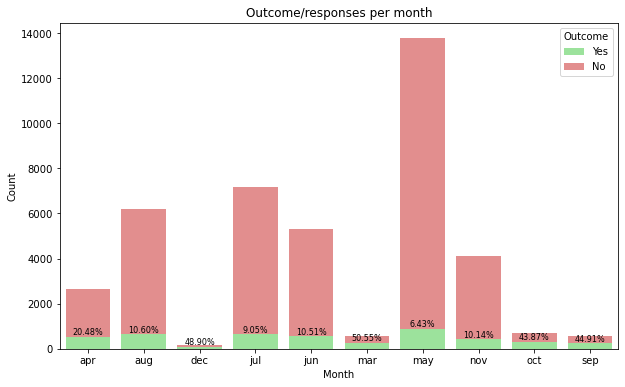

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


cross_tab = pd.crosstab(df['month'], df['y'])

plt.figure(figsize=(10, 6))
sns.barplot(x=cross_tab.index, y=cross_tab['yes'], label='Yes', color='lightgreen')
sns.barplot(x=cross_tab.index, y=cross_tab['no'], bottom=cross_tab['yes'], label='No', color='lightcoral')

plt.title('Outcome/responses per month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Outcome')

total_counts = cross_tab.sum(axis=1)
for edu, count, bar in zip(cross_tab.index, total_counts, plt.gca().patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{cross_tab.loc[edu]["yes"] / count * 100:.2f}%', ha='center', va='bottom', fontsize=8)

plt.show()

#### Visualizing outcomes based on loan/default

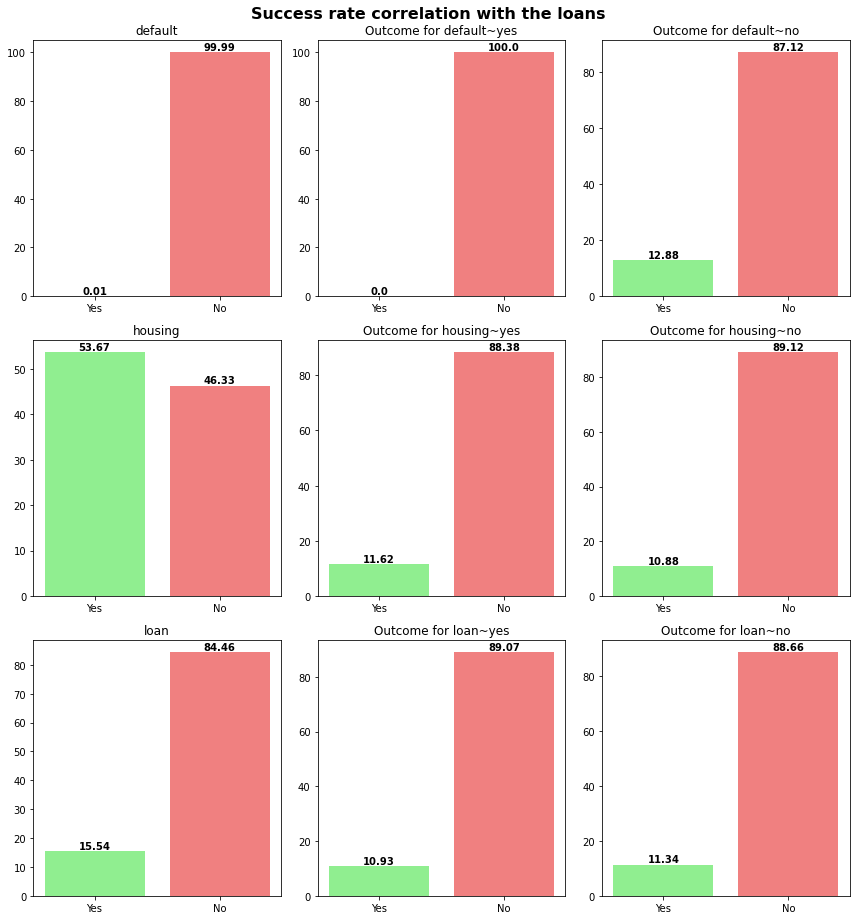

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 3, figsize=(12, 13))

axs = axs.flatten()

cols = ["default", "housing", "loan"]

colors = {'Yes': 'lightgreen', 'No': 'lightcoral'}

for i in range(3):
    yes_val = df[df[cols[i]] == 'yes'].shape[0]
    no_val = df[df[cols[i]] == 'no'].shape[0]
    tot_val = yes_val + no_val
    labels, values = ['Yes', 'No'],  [round(100*yes_val/tot_val, 2),  round(100*no_val/tot_val, 2)]
    axs[i * 3].bar(labels, values, color=[colors[label] for label in labels])
    axs[i * 3].set_title(f'{cols[i]}')

    for label, value in zip(labels, values):
        axs[i * 3].text(label, value, str(value), ha='center', va='bottom', fontweight='bold')

    yes_val = df[(df[cols[i]] == 'yes') & (df['y'] == 'yes')].shape[0]
    no_val = df[(df[cols[i]] == 'yes') & (df['y'] == 'no')].shape[0]
    tot_val = yes_val + no_val
    labels, values = ['Yes', 'No'],  [round(100*yes_val/tot_val, 2),  round(100*no_val/tot_val, 2)]
    axs[i * 3 + 1].bar(labels, values, color=[colors[label] for label in labels])
    axs[i * 3 + 1].set_title(f'Outcome for {cols[i]}~yes')

    for label, value in zip(labels, values):
        axs[i * 3 + 1].text(label, value, str(value), ha='center', va='bottom', fontweight='bold')


    yes_val = df[(df[cols[i]] == 'no') & (df['y'] == 'yes')].shape[0]
    no_val = df[(df[cols[i]] == 'no') & (df['y'] == 'no')].shape[0]
    tot_val = yes_val + no_val
    labels, values = ['Yes', 'No'],  [round(100*yes_val/tot_val, 2),  round(100*no_val/tot_val, 2)]
    axs[i * 3 + 2].bar(labels, values, color=[colors[label] for label in labels])
    axs[i * 3 + 2].set_title(f'Outcome for {cols[i]}~no')

    for label, value in zip(labels, values):
        axs[i * 3 + 2].text(label, value, str(value), ha='center', va='bottom', fontweight='bold')


fig.suptitle('Success rate correlation with the loans', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

#### Correlation Heatmap

<ipython-input-7-2449c98577a3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_corr.corr()


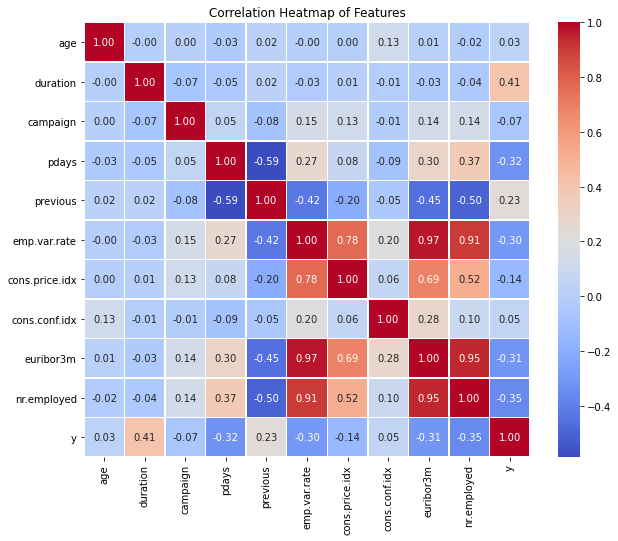

In [7]:
df_corr = df.copy()
df_corr['y'] = df_corr['y'].apply(lambda x: 1 if x == 'yes' else 0)

correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

### Getting the info about the column data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Getting the unique values present in the columns 'default', 'housing' & 'loan'

In [9]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [10]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [11]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

### Converting categorical data of the above columns to the numerical using label encoding as below
'no': -1
'yes': 1
'unknown': 0

In [12]:
def to_numeric(val):
    if val == 'no':
        return -1
    elif val == 'yes':
        return 1
    elif val == 'unknown':
        return 0
df['default'] = df['default'].apply(lambda x: to_numeric(x))
df['housing'] = df['housing'].apply(lambda x: to_numeric(x))
df['loan'] = df['loan'].apply(lambda x: to_numeric(x))

### Filling in the missing values in the education column with the most frequent value based on the job

In [13]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [14]:
#Getting the list of job categories which have 'unknown' value in education column
job_categories = list(df[df['education'] == 'unknown']['job'].unique())

In [15]:
#Filling the missing values('unknown') in education column with most frequent value based on the job role
for job in job_categories:
    edu = df[(df['education'] != 'unknown') & (df['job'] == job)]['education'].mode()[0]
    #df[(df['education'] == 'unknown') & (df['job'] == job)]['education'] = edu
    df.loc[(df['education'] == 'unknown') & (df['job'] == job), 'education'] = edu
    print(job,"--",edu)

blue-collar -- basic.9y
technician -- professional.course
admin. -- university.degree
unknown -- basic.4y
management -- university.degree
services -- high.school
entrepreneur -- university.degree
retired -- basic.4y
student -- high.school
self-employed -- university.degree
housemaid -- basic.4y
unemployed -- university.degree


In [16]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

### Converting categorical data of the education column to the numerical using label encoding as below
'illiterate': 0
'basic.4y': 4
'basic.6y': 6
'basic.9y': 9
'high.school': 12
'professional.course': 14
'university.degree: 16

In [17]:
def edu_to_numeric(edu):
    if 'basic' in edu:
        return int(edu.split('.')[-1][:-1])
    elif edu == 'illiterate':
        return 0
    elif edu == 'high.school':
        return 12
    elif edu == 'professional.course':
        return 14
    elif edu == 'university.degree':
        return 16
df['education'] = df['education'].apply(lambda x: edu_to_numeric(x))

In [18]:
df['education'].unique()

array([ 4, 12,  6,  9, 14, 16,  0])

### Converting categorical data of the 'month' and 'day of the week' column to the numerical using Cyclical Transform as below

In [19]:
dct_months = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12 
}
dct_days = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}

df['month'] = df['month'].apply(lambda x: dct_months[x])
df['month_sin'] = np.sin(df['month'] * (2 * np.pi / 12))
df['month_cos'] = np.cos(df['month'] * (2 * np.pi / 12))

df['day_of_week'] = df['day_of_week'].apply(lambda x: dct_days[x])
df['day_of_week_sin'] = np.sin(df['day_of_week'] * (2 * np.pi / 7))
df['day_of_week_cos'] = np.cos(df['day_of_week'] * (2 * np.pi / 7))

df.drop(['month', 'day_of_week'], axis = 1, inplace = True)

### Converting categorical data of the 'contact', 'pout' and 'y' column to the numerical using label encoding as below

In [20]:
dct_pout = {'failure': -1, 'nonexistent': 0, 'success': 1}
def contact_info_to_numeric(val):
    if val == 'telephone':
        return 0
    else:
        return 1
df['poutcome'] = df['poutcome'].apply(lambda x: dct_pout[x])
df['contact'] = df['contact'].apply(lambda x: contact_info_to_numeric(x))
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [21]:
df

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,56,housemaid,married,4,-1,-1,-1,0,261,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.781831,0.623490
1,57,services,married,12,0,-1,-1,0,149,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.781831,0.623490
2,37,services,married,12,-1,1,-1,0,226,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.781831,0.623490
3,40,admin.,married,6,-1,-1,-1,0,151,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.781831,0.623490
4,56,services,married,12,-1,-1,1,0,307,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,14,-1,1,-1,1,334,1,...,-1.1,94.767,-50.8,1.028,4963.6,1,-0.5,0.866025,-0.974928,-0.222521
41184,46,blue-collar,married,14,-1,-1,-1,1,383,1,...,-1.1,94.767,-50.8,1.028,4963.6,0,-0.5,0.866025,-0.974928,-0.222521
41185,56,retired,married,16,-1,1,-1,1,189,2,...,-1.1,94.767,-50.8,1.028,4963.6,0,-0.5,0.866025,-0.974928,-0.222521
41186,44,technician,married,14,-1,-1,-1,1,442,1,...,-1.1,94.767,-50.8,1.028,4963.6,1,-0.5,0.866025,-0.974928,-0.222521


### Converting categorical data of the 'job' and 'marital' columns to numerical using one hot encoding as below

In [22]:
df = pd.get_dummies(df, columns=['job'], prefix="job")
df.drop(['job_unknown'], axis = 1, inplace = True)
df = pd.get_dummies(df, columns=['marital'], prefix="marital")
df.drop(['marital_unknown'], axis = 1, inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   education          41188 non-null  int64  
 2   default            41188 non-null  int64  
 3   housing            41188 non-null  int64  
 4   loan               41188 non-null  int64  
 5   contact            41188 non-null  int64  
 6   duration           41188 non-null  int64  
 7   campaign           41188 non-null  int64  
 8   pdays              41188 non-null  int64  
 9   previous           41188 non-null  int64  
 10  poutcome           41188 non-null  int64  
 11  emp.var.rate       41188 non-null  float64
 12  cons.price.idx     41188 non-null  float64
 13  cons.conf.idx      41188 non-null  float64
 14  euribor3m          41188 non-null  float64
 15  nr.employed        41188 non-null  float64
 16  y                  411

### Seperating the output column from the dataframe

In [24]:
df_out = df['y']
df.drop(['y'], axis = 1, inplace = True)

### Standardizing all the columns of the dataframe

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in df.columns:
    col_data = np.array(df[col]).reshape(-1, 1)
    scaler.fit(col_data)
    scaled_data = scaler.transform(col_data)
    df[col] = scaled_data

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(df,df_out,test_size=0.20)

In [27]:
# Oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy=0.5)
X_train_ovrsmpl, y_train_ovrsmpl = sm.fit_resample(X_train, y_train)

In [28]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 20)
 
X_train_pca = pca.fit_transform(X_train_ovrsmpl)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [29]:
explained_variance.sum()

0.8599958683568705

In [30]:
# X_train_pca, y_train_ovrsmpl, X_test_pca, y_test

### Cross validation to get the optimal hyper parameter value (n_neighbors) for KNN

In [31]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [32]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipe_line = Pipeline ([
    ('oversampling', SMOTE(sampling_strategy = 0.5)),
    ('pca', PCA(n_components=20)),
    ('model', KNeighborsClassifier()),
])

param_grid = {
    'model__n_neighbors': range(3,42,2)
}

rand_search = GridSearchCV(pipe_line, param_grid, cv=5, scoring='balanced_accuracy', verbose=3)

# Fit the model
rand_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", rand_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..............model__n_neighbors=3;, score=0.766 total time=   0.6s
[CV 2/5] END ..............model__n_neighbors=3;, score=0.769 total time=   0.6s
[CV 3/5] END ..............model__n_neighbors=3;, score=0.771 total time=   0.6s
[CV 4/5] END ..............model__n_neighbors=3;, score=0.749 total time=   0.6s
[CV 5/5] END ..............model__n_neighbors=3;, score=0.749 total time=   0.6s
[CV 1/5] END ..............model__n_neighbors=5;, score=0.800 total time=   0.6s
[CV 2/5] END ..............model__n_neighbors=5;, score=0.794 total time=   0.6s
[CV 3/5] END ..............model__n_neighbors=5;, score=0.793 total time=   0.6s
[CV 4/5] END ..............model__n_neighbors=5;, score=0.775 total time=   0.6s
[CV 5/5] END ..............model__n_neighbors=5;, score=0.765 total time=   0.6s
[CV 1/5] END ..............model__n_neighbors=7;, score=0.812 total time=   0.6s
[CV 2/5] END ..............model__n_neighbors=7

In [33]:
# n_neighbors based on the cross validation
n_neighbors = rand_search.best_params_['model__n_neighbors']

### Results using sklearn KNN classifier

In [34]:
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train_pca, y_train_ovrsmpl)
pred = knn.predict(X_test_pca)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7311
           1       0.43      0.72      0.54       927

    accuracy                           0.86      8238
   macro avg       0.70      0.80      0.73      8238
weighted avg       0.90      0.86      0.88      8238



### Approach 1: KNN implementation from scratch using Approximate Nearest Neighbors Oh Yeah (ANNOY)

In [35]:
class KNNClassifier_annoy:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        self.root_node1 = None
        self.root_node2 = None
        self.root_node3 = None
        self.coordinate_output_map = {}
    
    class Node:
        def __init__(self, line_equation, points_below, points_above):
            self.line_equation = line_equation
            self.points_below = points_below
            self.points_above = points_above
            self.left = None
            self.right = None

    def get_line_equation(self, point1, point2):
        """
        Line equation which is equidistant from point1 and point2 and perpendicular to line between point1 and point2
        """
        direction_vector = point2 - point1
        if direction_vector.sum() == 0:
            raise ValueError("Points must be different")
        direction_vector /= np.linalg.norm(direction_vector)
        offset = np.dot(direction_vector, point1)
        return direction_vector, offset
    
    def is_point_above_line(self, point, line_equation):
        """
        To check if the point is above or below the line
        """
        if len(point) != len(line_equation[0]):
            raise ValueError("Point must have the same dimension as the line equation")
    
        # Calculate the vector pointing from the line to the point
        point_to_line_vector = point - line_equation[1]
    
        # Calculate the dot product of the point-to-line vector and the direction vector
        dot_product = np.dot(point_to_line_vector, line_equation[0])
    
        if dot_product > 0:
            return True  # Point is above the line
        elif dot_product < 0:
            return False  # Point is below the line
        else:
            return False  # Point is on the line
    
    def get_random_pos(self, st, en):
        """
        Getting random indexes to choose two points
        """
        pos1 = random.randint(st, en-1)
        while 1:
            pos2 = random.randint(st, en-1)
            if pos2 == pos1:
                continue
            else:
                return pos1, pos2
    
    def construct_node(self, points):
        """
        Creates a node based on the points
        """
        if len(points) < 2:
            return None
        pos1, pos2 = self.get_random_pos(0, len(points))
        p1 = points[pos1]
        p2 = points[pos2]
    
        direction_vector = p2 - p1
        if direction_vector.sum() == 0:
            return None
        line_equation = self.get_line_equation(np.array(p1), np.array(p2))
        points_below = []
        points_above = []
        for point in points:
            if self.is_point_above_line(np.array(point), line_equation):
                points_above.append(point)
            else:
                points_below.append(point)
        node = self.Node(line_equation, points_below, points_above)
        return node
    
    def construct_tree(self, node, points):
        """
        Constructs a tree. Keeps on expanding the tree till the points in the root nodes reaches a certain minimum
        """
        if node is None or len(points) <= 50:
            return None
        else:
            node.left = self.construct_node(node.points_below) # equation, below, above
            node.right = self.construct_node(node.points_above)
            self.construct_tree(node.left, node.points_below)
            self.construct_tree(node.right, node.points_above)
    
    def fit(self, X_train_pca, y_train_ovrsmpl):
        """
        Building the tree
        """
        ###  As the ANNOY method is quite dependent on the randomly chosen points to determine the splitting lines. We will 
        #                 be constructing three trees to minimize the effect of bad splits leading to bad approximation of neighbours
        # Constructing Tree 1
        X_input_data = np.array(X_train_pca)
        y_input_data = np.array(y_train_ovrsmpl)
        all_points = list(X_input_data)
        self.root_node1 = self.construct_node(all_points)
        self.construct_tree(self.root_node1, all_points)
        # Constructing Tree 2
        self.root_node2 = self.construct_node(all_points)
        self.construct_tree(self.root_node2, all_points)
        # Constructing Tree 3
        self.root_node3 = self.construct_node(all_points)
        self.construct_tree(self.root_node3, all_points)
        
        # Using Dictionary to store the output value for each of the points. key = point, value = output
        for i, point in enumerate(X_input_data):
            self.coordinate_output_map[tuple(point)] = y_input_data[i]

    
    def euclidean_distance(self, point1, point2):
        """
        To get the distance between the two points
        """
        squared_diff = [(p1 - p2) ** 2 for p1, p2 in zip(point1, point2)]
        distance = np.sqrt(sum(squared_diff))
        return distance

    def get_nearest_points_annoy(self, root_node, new_point):
        """
        Parsing through the tree to get the approximate nearest neighbours of the new point
        """
        nd = None
        tmp_node = root_node
        while tmp_node != None:
            line_equation = tmp_node.line_equation
            nd = tmp_node
            if self.is_point_above_line(new_point, line_equation):
                tmp_node = tmp_node.right
            else:
                tmp_node = tmp_node.left
        nearest_points = nd.points_below + nd.points_above
        return nearest_points
    
    def predict_single_point(self, root_node_lst, new_point, coordinate_output_map):
        """
        Predicting the output for the new point based on the k nearest neighbours
        """
        nearest_points = []
        for root_node in root_node_lst:
            nearest_points = nearest_points + self.get_nearest_points_annoy(root_node, new_point)
        nearest_points = np.unique(nearest_points, axis=0)
    
        points_dst = []
        #Calculating distances from the new point for all the nearest neighbours
        for point in nearest_points:
            points_dst.append((self.euclidean_distance(new_point, point), point))
        points_dst = sorted(points_dst, key=lambda x: x[0])
        points_dst = [point[1] for point in points_dst]
        points_dst = points_dst[:self.n_neighbors] #Getting the k closest points to the new point
        num_1 = 0; num_0 = 0
        for point in nearest_points:
            point = tuple(point)
            if coordinate_output_map[point]:
                num_1 = num_1 + 1
            else:
                num_0 = num_0 + 1
        #Returning the majority value among the k nearest points
        return num_1 >= num_0


    def predict(self, X_test_pca):
        """
        Predicting the output for the test cases
        """
        y_pred = []
        X_test = list(np.array(X_test_pca))
        root_node_lst = [self.root_node1, self.root_node2, self.root_node3]
        for point in X_test_pca:
            y_pred.append(self.predict_single_point(root_node_lst, point, self.coordinate_output_map))
        return y_pred

In [36]:
knn_classifier = KNNClassifier_annoy(n_neighbors = n_neighbors)
knn_classifier.fit(X_train_pca, y_train_ovrsmpl)
y_pred = knn_classifier.predict(X_test_pca)

### Results for KNN using ANNOY algorithm

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7311
           1       0.42      0.70      0.52       927

    accuracy                           0.86      8238
   macro avg       0.69      0.79      0.72      8238
weighted avg       0.90      0.86      0.87      8238



### Approach 2: KNN implementation from scratch using KD tree

In [38]:
class KNNClassifier_kd_tree:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        self.root_node = None
        self.coordinate_output_map = {}
    class Node:
        def __init__(self, points_median, points_left, points_right):
            self.points_median = points_median
            self.points_left = points_left
            self.points_right = points_right
            self.left = None
            self.right = None
    
    def construct_node(self, points, depth):
        """
        Creates a node based on the points and the depth of the node.
        """
        if len(points) <= 50:
            return None
        depth = depth % len(points[0])
        points.sort(key=lambda x: x[depth])
        mid = len(points) // 2
        points_median = points[mid][depth] #Median of the (depth)th value for each of the coordinates
        points_left = points[:mid] #Points which are less than the median value
        points_right = points[mid+1:] #Points which are more than or equal to the median value
        node = self.Node(points_median, points_left, points_right)
        return node
    
    def construct_tree(self, node, points, depth):
        """
        Constructs a KD tree. Keeps on expanding the tree till the points in the root nodes reaches a certain minimum
        """
        if node is None or len(points) <= 50:
            return None
        else:
            node.left = self.construct_node(node.points_left, depth)
            node.right = self.construct_node(node.points_right, depth)
            self.construct_tree(node.left, node.points_left, depth+1)
            self.construct_tree(node.right, node.points_right, depth+1)
    
    def fit(self, X_train_pca, y_train_ovrsmpl):
        """
        Building the KD tree
        """
        points = list(np.array(X_train_pca))
        self.root_node = self.construct_node(points, 0) #Creating a root node
        self.construct_tree(self.root_node, points, 1) #Constructing the KD tree
        points = list(np.array(X_train_pca))
        # Using Dictionary to store the output value for each of the points. key = point, value = output
        for i, point in enumerate(points):
            self.coordinate_output_map[tuple(point)] = y_train_ovrsmpl.iloc[i]

    def euclidean_distance(self, point1, point2):
        """
        To get the distance between the two points
        """
        squared_diff = [(p1 - p2) ** 2 for p1, p2 in zip(point1, point2)]
        distance = np.sqrt(sum(squared_diff))
        return distance
    
    def get_nearest_points_kdtree(self, root_node, new_point):
        """
        Parsing through the KD tree to get the approximate nearest neighbours of the new point
        """
        nd = None
        tmp_node = root_node
        depth = 0
        while tmp_node != None:
            points_median = tmp_node.points_median
            nd = tmp_node
            if new_point[depth] <= points_median:
                tmp_node = tmp_node.left
            else:
                tmp_node = tmp_node.right
            depth = depth + 1
            depth = depth%len(new_point)
        nearest_points = nd.points_left + nd.points_right
        return nearest_points
    
    def predict_single_point(self, root_node, new_point, coordinate_output_map):
        """
        Predicting the output for the new point based on the k nearest neighbours
        """
        nearest_points = self.get_nearest_points_kdtree(root_node, new_point)
        points_dst = []
        #Calculating distances from the new point for all the nearest neighbours
        for point in nearest_points:
            points_dst.append((self.euclidean_distance(new_point, point), point))
        points_dst = sorted(points_dst, key=lambda x: x[0])
        points_dst = [point[1] for point in points_dst]
        points_dst = points_dst[:self.n_neighbors] #Getting the k closest points to the new point
        num_1 = 0; num_0 = 0
        for point in nearest_points:
            point = tuple(point)
            if coordinate_output_map[point]:
                num_1 = num_1 + 1
            else:
                num_0 = num_0 + 1
        #Returning the majority value among the k nearest points
        return num_1 >= num_0

    def predict(self, X_test_pca):
        """
        Predicting the output for the test cases
        """
        y_pred = []
        X_test = list(np.array(X_test_pca))
        for point in X_test:
            y_pred.append(self.predict_single_point(self.root_node, point, self.coordinate_output_map))  
        return y_pred

In [39]:
knn_classifier = KNNClassifier_kd_tree(n_neighbors = n_neighbors)
knn_classifier.fit(X_train_pca, y_train_ovrsmpl)
y_pred = knn_classifier.predict(X_test_pca)

### Results for KNN using KD tree algorithm

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      7311
           1       0.37      0.70      0.49       927

    accuracy                           0.84      8238
   macro avg       0.67      0.77      0.69      8238
weighted avg       0.89      0.84      0.86      8238



### Conclusion for KNN

The results from ANNOY and KD tree algorithm for the KNN are pretty much inline with the sklearn KNN model results. This can be confirmed by comparing the recall and f1 score for both the classes 0 and 1. The slight difference in the values can be attributed to the better optimization employed in SciKit Learn library

### Cross validation to get the optimal hyper parameters for Decision Tree

In [41]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

pipe_line = Pipeline ([
    ('oversampling', SMOTE(sampling_strategy = 0.5)),
    ('model', DecisionTreeClassifier()),
])

param_grid = {
    'model__criterion': ['entropy', 'gini'],
    'model__max_depth': range(5, 11, 1),
    'model__class_weight': ['balanced'],
    'model__random_state': [12],
    'model__min_weight_fraction_leaf': [0.01, 0.02, 0.03, 0.04, 0.05]
}

# Define the scoring metrics
# scoring = {
#     'precision': make_scorer(precision_score, average='weighted'),
#     'recall': make_scorer(recall_score, average='weighted'),
#     'f1_score': make_scorer(f1_score, average='weighted')
# }

rand_search = GridSearchCV(pipe_line, param_grid, cv=5, scoring='balanced_accuracy', verbose=3)

# rand_search = GridSearchCV(pipe_line, param_grid, cv=5, scoring=scoring, verbose=3, refit='f1_score')

# Fit the model
rand_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", rand_search.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END model__class_weight=balanced, model__criterion=entropy, model__max_depth=5, model__min_weight_fraction_leaf=0.01, model__random_state=12;, score=0.871 total time=   0.2s
[CV 2/5] END model__class_weight=balanced, model__criterion=entropy, model__max_depth=5, model__min_weight_fraction_leaf=0.01, model__random_state=12;, score=0.875 total time=   0.2s
[CV 3/5] END model__class_weight=balanced, model__criterion=entropy, model__max_depth=5, model__min_weight_fraction_leaf=0.01, model__random_state=12;, score=0.859 total time=   0.2s
[CV 4/5] END model__class_weight=balanced, model__criterion=entropy, model__max_depth=5, model__min_weight_fraction_leaf=0.01, model__random_state=12;, score=0.870 total time=   0.2s
[CV 5/5] END model__class_weight=balanced, model__criterion=entropy, model__max_depth=5, model__min_weight_fraction_leaf=0.01, model__random_state=12;, score=0.862 total time=   0.2s
[CV 1/5] END model__cla

### Results using off the shelf sklearn Decision Tree Classifier

In [46]:
dtree_model = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'gini', max_depth = 9, min_weight_fraction_leaf = 0.01, random_state = 12)
dtree_model.fit(X_train_ovrsmpl, y_train_ovrsmpl)
y_pred = dtree_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7311
           1       0.44      0.87      0.58       927

    accuracy                           0.86      8238
   macro avg       0.71      0.87      0.75      8238
weighted avg       0.92      0.86      0.88      8238



### Decision Tree Classifier from scratch

In [47]:
class DTreeClassifier:
    def __init__(self, max_depth=None, criterion=None, class_weight=None, min_weight_fraction_leaf=0.0, random_state=None):
        self.max_depth = max_depth
        self.class_weight = class_weight
        self.criterion = criterion
        self.min_weight_fraction_leaf = min_weight_fraction_leaf
        self.tree = None
        self.CTR_FUNC = {'entropy': self.entropy, 'gini': self.gini}
        self.random_state = random_state
        self.threshold = 1e-7
        np.random.seed(random_state)
    
    def fit(self, X, y):
        if self.class_weight == 'balanced':
            self.class_weight = self.compute_class_weight(y)
        elif self.class_weight == None:
            self.class_weight = [1, 1]
        y = np.array(y)
        self.tree = self.build_tree(X, y, depth=0, class_weight=self.class_weight)

    def compute_class_weight(self, y):
        return len(y)/(np.bincount(y)*2)

    def entropy(self, y, class_weight):
        # Calculate entropy
        sample_weights = class_weight[y]
        class_counts = np.bincount(y, minlength=2, weights=sample_weights)
        probs = class_counts/np.sum(sample_weights)
        entropy = -np.sum(probs * np.log2(probs+1e-10))
        return entropy

    def gini(self, y, class_weight):
        sample_weights = class_weight[y]
        class_counts = np.bincount(y, minlength=2, weights=sample_weights)
        probs = class_counts/np.sum(sample_weights)
        gini = 1.0 - np.sum(probs**2)
        return gini

    def info_gain(self, y, n_samples, current_impurity, left_split, right_split, class_weight):
        left_impurity = self.CTR_FUNC[self.criterion](y[left_split], class_weight)
        right_impurity = self.CTR_FUNC[self.criterion](y[right_split], class_weight)

        weighted_impurity = (np.sum(left_split) * left_impurity + np.sum(right_split) * right_impurity) / n_samples
        information_gain = current_impurity - weighted_impurity
        return information_gain

    def get_bootstrap_sample(self, X, y):
        random_generator = np.random.RandomState(self.random_state)
        samples = random_generator.choice(range(len(y)), size=len(y), replace=True)
        return X.iloc[samples, :], y[samples]
    def build_tree(self, X, y, depth, class_weight):
        # Recursive function to build the decision tree
        X, y = self.get_bootstrap_sample(X, y)
        n_samples, n_features = X.shape

        if depth == self.max_depth or n_samples < 2 or np.all(y == y[0]):
            # Create a leaf node
            return {'class': y[0], 'count': n_samples}

        best_feature, best_value, max_gain = None, None, -1
        sample_weights = class_weight[y]

        current_impurity = self.CTR_FUNC[self.criterion](y, class_weight)

        for feature in np.random.choice(X.columns, size=n_features, replace=False):
            unique_values = np.unique(X[feature])
            if unique_values[-1]-unique_values[0] < self.threshold:
                continue
            for value in unique_values:
                left_split = X[feature] <= value
                right_split = ~left_split

                if np.sum(left_split) < self.min_weight_fraction_leaf * n_samples or \
                   np.sum(right_split) < self.min_weight_fraction_leaf * n_samples:
                    # Skip the splits that do not satisfy min_weight_fraction_leaf
                    continue

                info_gain = self.info_gain(y, n_samples, current_impurity, left_split, right_split, class_weight)

                if info_gain > max_gain:
                    max_gain = info_gain
                    best_feature = feature
                    best_value = value

        if max_gain > 0:
            # Create a decision node
            left_split = X[best_feature] <= best_value
            right_split = ~left_split

            left_subtree = self.build_tree(X[left_split], y[left_split], depth + 1, class_weight)
            right_subtree = self.build_tree(X[right_split], y[right_split], depth + 1, class_weight)

            return {
                'feature': best_feature,
                'threshold': best_value,
                'left': left_subtree,
                'right': right_subtree
            }
        else:
            # Create a leaf node if the gain is -ve
            return {'class': np.argmax(np.bincount(y)), 'count': n_samples}

    def predict_row(self, row, tree):
        if 'class' in tree:
            return tree['class']
        else:
            if row[tree['feature']] <= tree['threshold']:
                return self.predict_row(row, tree['left'])
            else:
                return self.predict_row(row, tree['right'])

    def predict(self, X):
        if self.tree is None:
            raise ValueError("The model has not been fitted yet.")
        return np.array([self.predict_row(row, self.tree) for _, row in X.iterrows()])

In [48]:
# Example usage:
# Initialize the DecisionTreeClassifier with your desired parameters
dt_classifier = DTreeClassifier(max_depth=9, criterion='gini', class_weight='balanced', min_weight_fraction_leaf=0.01, random_state=12)

# Fit the model to your data
dt_classifier.fit(X_train_ovrsmpl, y_train_ovrsmpl)

# Make predictions
predictions = dt_classifier.predict(X_test)
# print(predictions)

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7311
           1       0.44      0.79      0.57       927

    accuracy                           0.86      8238
   macro avg       0.71      0.83      0.74      8238
weighted avg       0.91      0.86      0.88      8238



### Conclusion for Decision Tree

The results from scratch implementation are pretty much inline with the sklearn Decision tree classifier. This can be confirmed by comparing the recall and f1 score for both the classes 0 and 1. The slight difference in the values can be attributed to the better optimization and pruning techniques employed in sklearn library